In [8]:
import importlib
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

import mysklearn.utils
importlib.reload(mysklearn.utils)
import mysklearn.plot_utils as plot_utils
importlib.reload(mysklearn.plot_utils)


<module 'mysklearn.plot_utils' from '/home/finalProject/mysklearn/plot_utils.py'>

# Base Dataset

In [9]:
pre_diabetes_dataset = MyPyTable()
pre_diabetes_dataset.load_from_file("input_data/diabetes_prediction_dataset.csv")

diabetes_dataset = MyPyTable()
diabetes_dataset.load_from_file("output_data/diabetes_minimize.csv")

diabetes_headers = diabetes_dataset.column_names
diabetes_data = diabetes_dataset.data

# Diabetes Processed Data
* removed all rows with no data for smoking

In [10]:
print("Pre processed dataset: rows and columns", pre_diabetes_dataset.get_shape())
print("Post processed dataset: rows and columns", diabetes_dataset.get_shape())

Pre processed dataset: rows and columns (100000, 9)
Post processed dataset: rows and columns (2000, 9)


# Dataset Diabetes Distribution

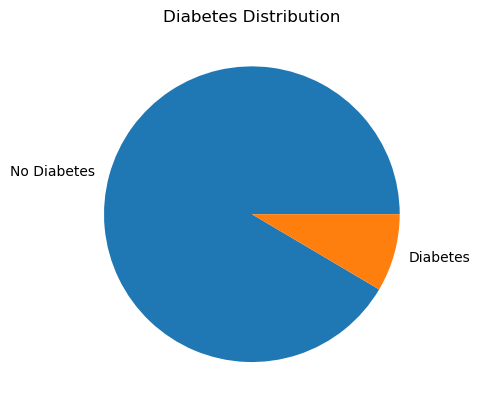

In [11]:
plot_utils.plot_diabetes_status()

# Gender Distribution

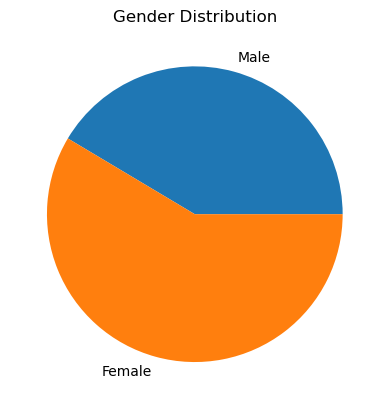

In [12]:
plot_utils.plot_gender_distribution()

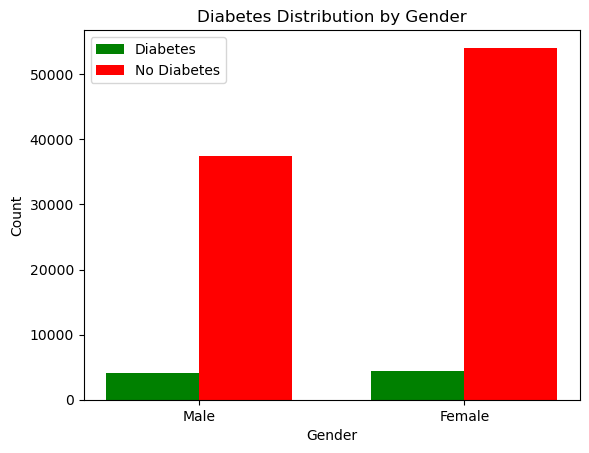

In [13]:
plot_utils.plot_diabetes_by_gender()

# Age Distribution

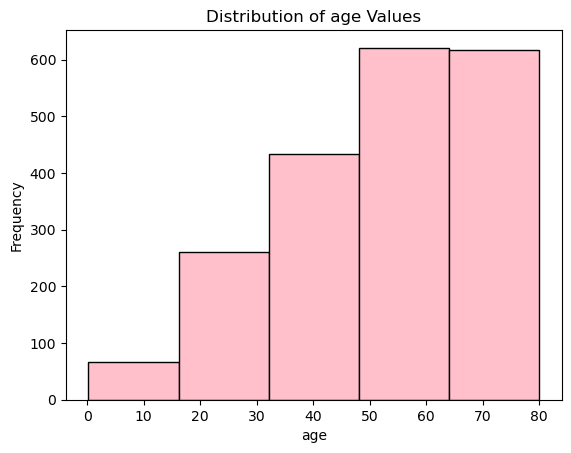

In [14]:
plot_utils.basic_histogram(diabetes_data, diabetes_headers, "age", 5)

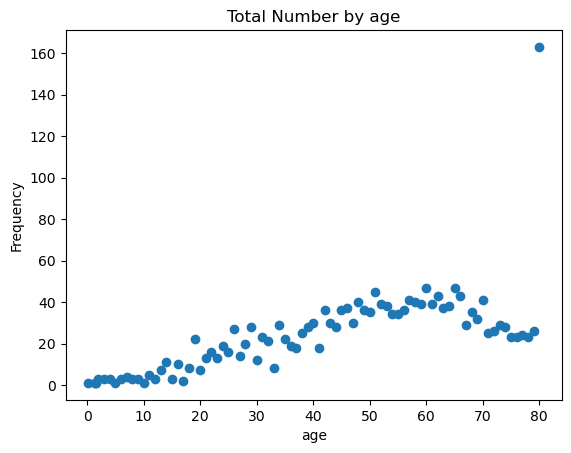

In [15]:
plot_utils.frequencies_scatter(diabetes_data, diabetes_headers, "age")

# Blood Glucose Level Distribution

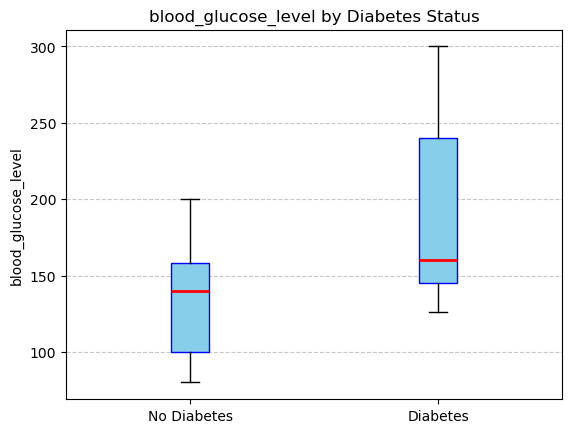

In [16]:
plot_utils.continuous_box_plt(diabetes_data, diabetes_headers, "blood_glucose_level")

# Heart Disease

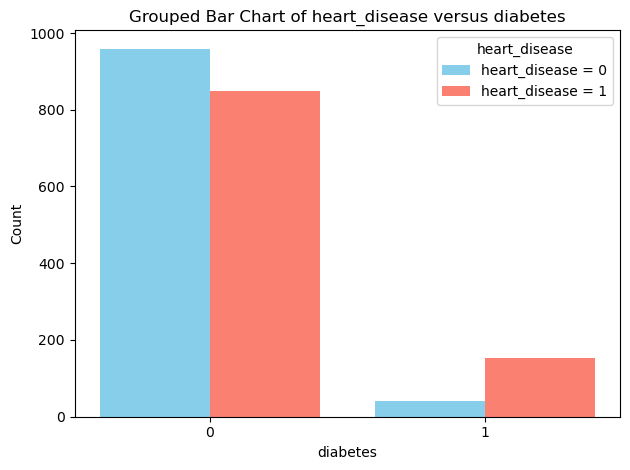

In [17]:
plot_utils.grouped_bar_chart(diabetes_data, diabetes_headers, "heart_disease")

# BMI

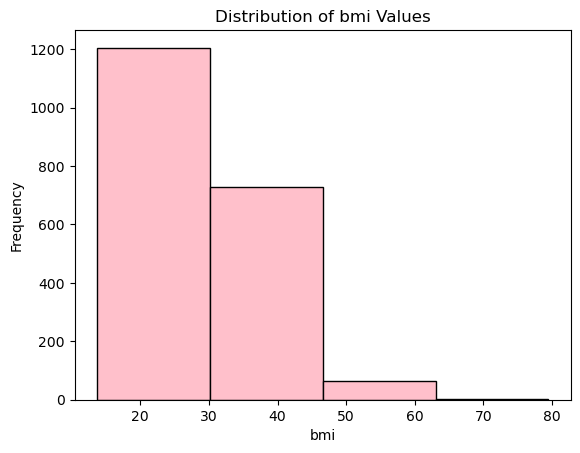

In [18]:
plot_utils.basic_histogram(diabetes_data, diabetes_headers, "bmi", 4)

Issue encountered: bmi resulted in several outliers when sorted by diabetes classificiation

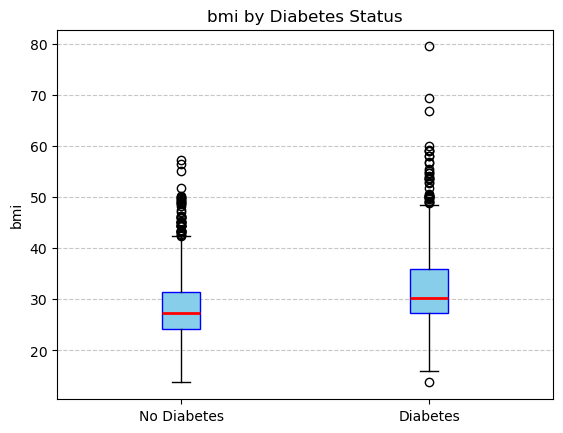

In [19]:
plot_utils.continuous_box_plt(diabetes_data, diabetes_headers, "bmi")

# HbA1c Level

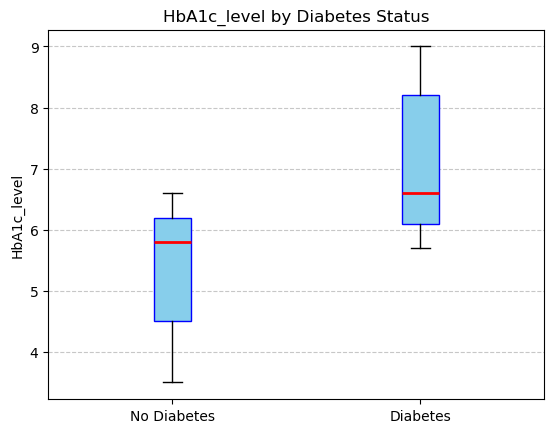

In [20]:
plot_utils.continuous_box_plt(diabetes_data, diabetes_headers, "HbA1c_level")

# Smoking History

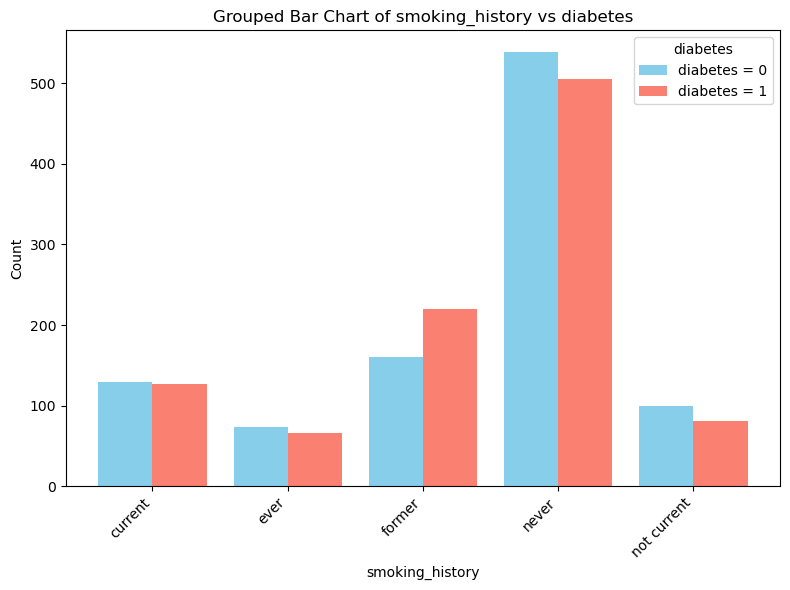

In [21]:
plot_utils.categorical_vs_binary_plt(diabetes_data, diabetes_headers, "smoking_history", "diabetes")

# Computing Summary Statistics
Maybe separate the dataset for diabetes = 0 and = 1? 

In [22]:
print("Overall dataset statistics")
print("------------------------------")

column_names = ["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level"]
summary_stats = diabetes_dataset.compute_summary_statistics(column_names)
summary_stats.pretty_print()

Overall dataset statistics
------------------------------
attribute              min     max      mid       avg    median
-------------------  -----  ------  -------  --------  --------
age                   0.24   80      40.12    52.9658    55
hypertension          0       1       0.5      0.164      0
heart_disease         0       1       0.5      0.0965     0
bmi                  13.73   79.46   46.595   30.2693    27.935
HbA1c_level           3.5     9       6.25     6.2043     6.1
blood_glucose_level  80     300     190      161.816    155


In [23]:
print("Diabetes instances statistics")
print("------------------------------")

diabetes_dataset.save_to_file_condition("output_data/diabetes_minimize.csv", "diabetes", 1)
positive_diabetes = MyPyTable()
positive_diabetes.load_from_file("output_data/positive_diabetes.csv")

pos_stats = positive_diabetes.compute_summary_statistics(column_names)
pos_stats.pretty_print()

Diabetes instances statistics
------------------------------
attribute               min     max      mid       avg    median
-------------------  ------  ------  -------  --------  --------
age                   13      80      46.5     60.715      62.5
hypertension           0       1       0.5      0.243       0
heart_disease          0       1       0.5      0.152       0
bmi                   13.73   79.46   46.595   32.1371     30.18
HbA1c_level            5.7     9       7.35     6.9945      6.6
blood_glucose_level  126     300     213      191.309     160


In [24]:
print("Non-Diabetes instances statisitcs")
print("------------------------------")

diabetes_dataset.save_to_file_condition("output_data/diabetes_minimize.csv", "diabetes", 0)
negative_diabetes = MyPyTable()
negative_diabetes.load_from_file("output_data/negative_diabetes.csv")

neg_stats = negative_diabetes.compute_summary_statistics(column_names)
neg_stats.pretty_print()

Non-Diabetes instances statisitcs
------------------------------
attribute              min     max     mid       avg    median
-------------------  -----  ------  ------  --------  --------
age                   0.24   80      40.12   45.2167     46
hypertension          0       1       0.5     0.085       0
heart_disease         0       1       0.5     0.041       0
bmi                  13.8    57.16   35.48   28.4016     27.32
HbA1c_level           3.5     6.6     5.05    5.4141      5.8
blood_glucose_level  80     200     140     132.324     140
